In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [11]:
train_path = pd.read_csv('train.csv')
test_path = pd.read_csv('test.csv')

In [13]:
#observing the first five row
print(train_path.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        26.0          male        Associate       256862.0               2   
1        23.0        female        Associate        70430.0               0   
2        33.0          male        Associate        75456.0              10   
3        27.0        female        Associate        25052.0               7   
4        30.0        female         Bachelor        61291.0               8   

  person_home_ownership  loan_amnt        loan_intent  loan_int_rate  \
0              MORTGAGE    35000.0          EDUCATION          10.65   
1              MORTGAGE     6455.0            VENTURE          10.24   
2                  RENT     7000.0            MEDICAL           7.03   
3                  RENT     5500.0           PERSONAL           7.43   
4              MORTGAGE     3984.0  DEBTCONSOLIDATION          10.86   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.14  

In [ ]:
print(train_path.info()) #Check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31500 entries, 0 to 31499
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31500 non-null  float64
 1   person_gender                   31500 non-null  int64  
 2   person_income                   31500 non-null  float64
 3   person_emp_exp                  31500 non-null  int64  
 4   loan_amnt                       31500 non-null  float64
 5   loan_int_rate                   31500 non-null  float64
 6   loan_percent_income             31500 non-null  float64
 7   cb_person_cred_hist_length      31500 non-null  float64
 8   credit_score                    31500 non-null  float64
 9   previous_loan_defaults_on_file  31500 non-null  int64  
 10  loan_status                     31500 non-null  int64  
 11  loan_id                         31500 non-null  int64  
 12  person_education_Bachelor       

In [ ]:
print(train_path.describe()) #Get summary statistics

         person_age  person_gender  person_income  person_emp_exp  \
count  31500.000000   31500.000000   31500.000000    31500.000000   
mean      27.742222       0.549429      -0.979736        5.381524   
std        6.037568       0.497559       0.024694        6.059623   
min       20.000000       0.000000      -1.000000        0.000000   
25%       24.000000       0.000000      -0.989065        1.000000   
50%       26.000000       1.000000      -0.983574        4.000000   
75%       30.000000       1.000000      -0.975604        8.000000   
max      144.000000       1.000000       1.000000      125.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  31500.000000   31500.000000         31500.000000   
mean      -0.473712      11.021207             0.139393   
std        0.367349       2.980539             0.087353   
min       -1.000000       5.420000             0.000000   
25%       -0.739130       8.590000             0.070000   
50%       -0.565217     

In [ ]:
train_path.isnull().sum() #Check for null values

person_age                        0
person_gender                     0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
loan_id                           0
person_education_Bachelor         0
person_education_Doctorate        0
person_education_High School      0
person_education_Master           0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
dtype: int64

<Axes: >

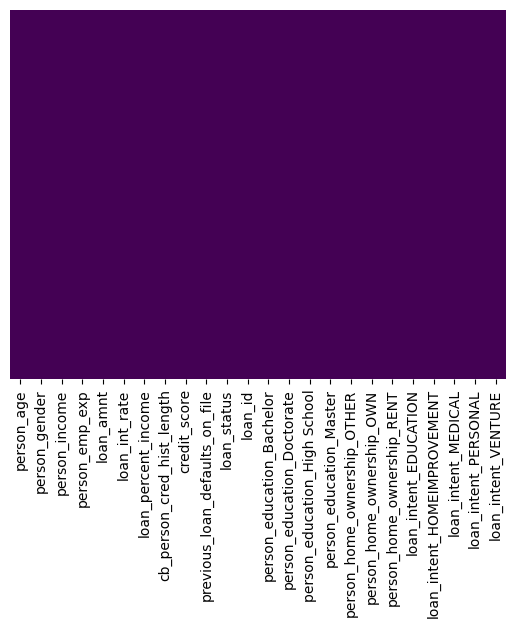

In [ ]:
sns.heatmap(train_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Numerical variables: 10


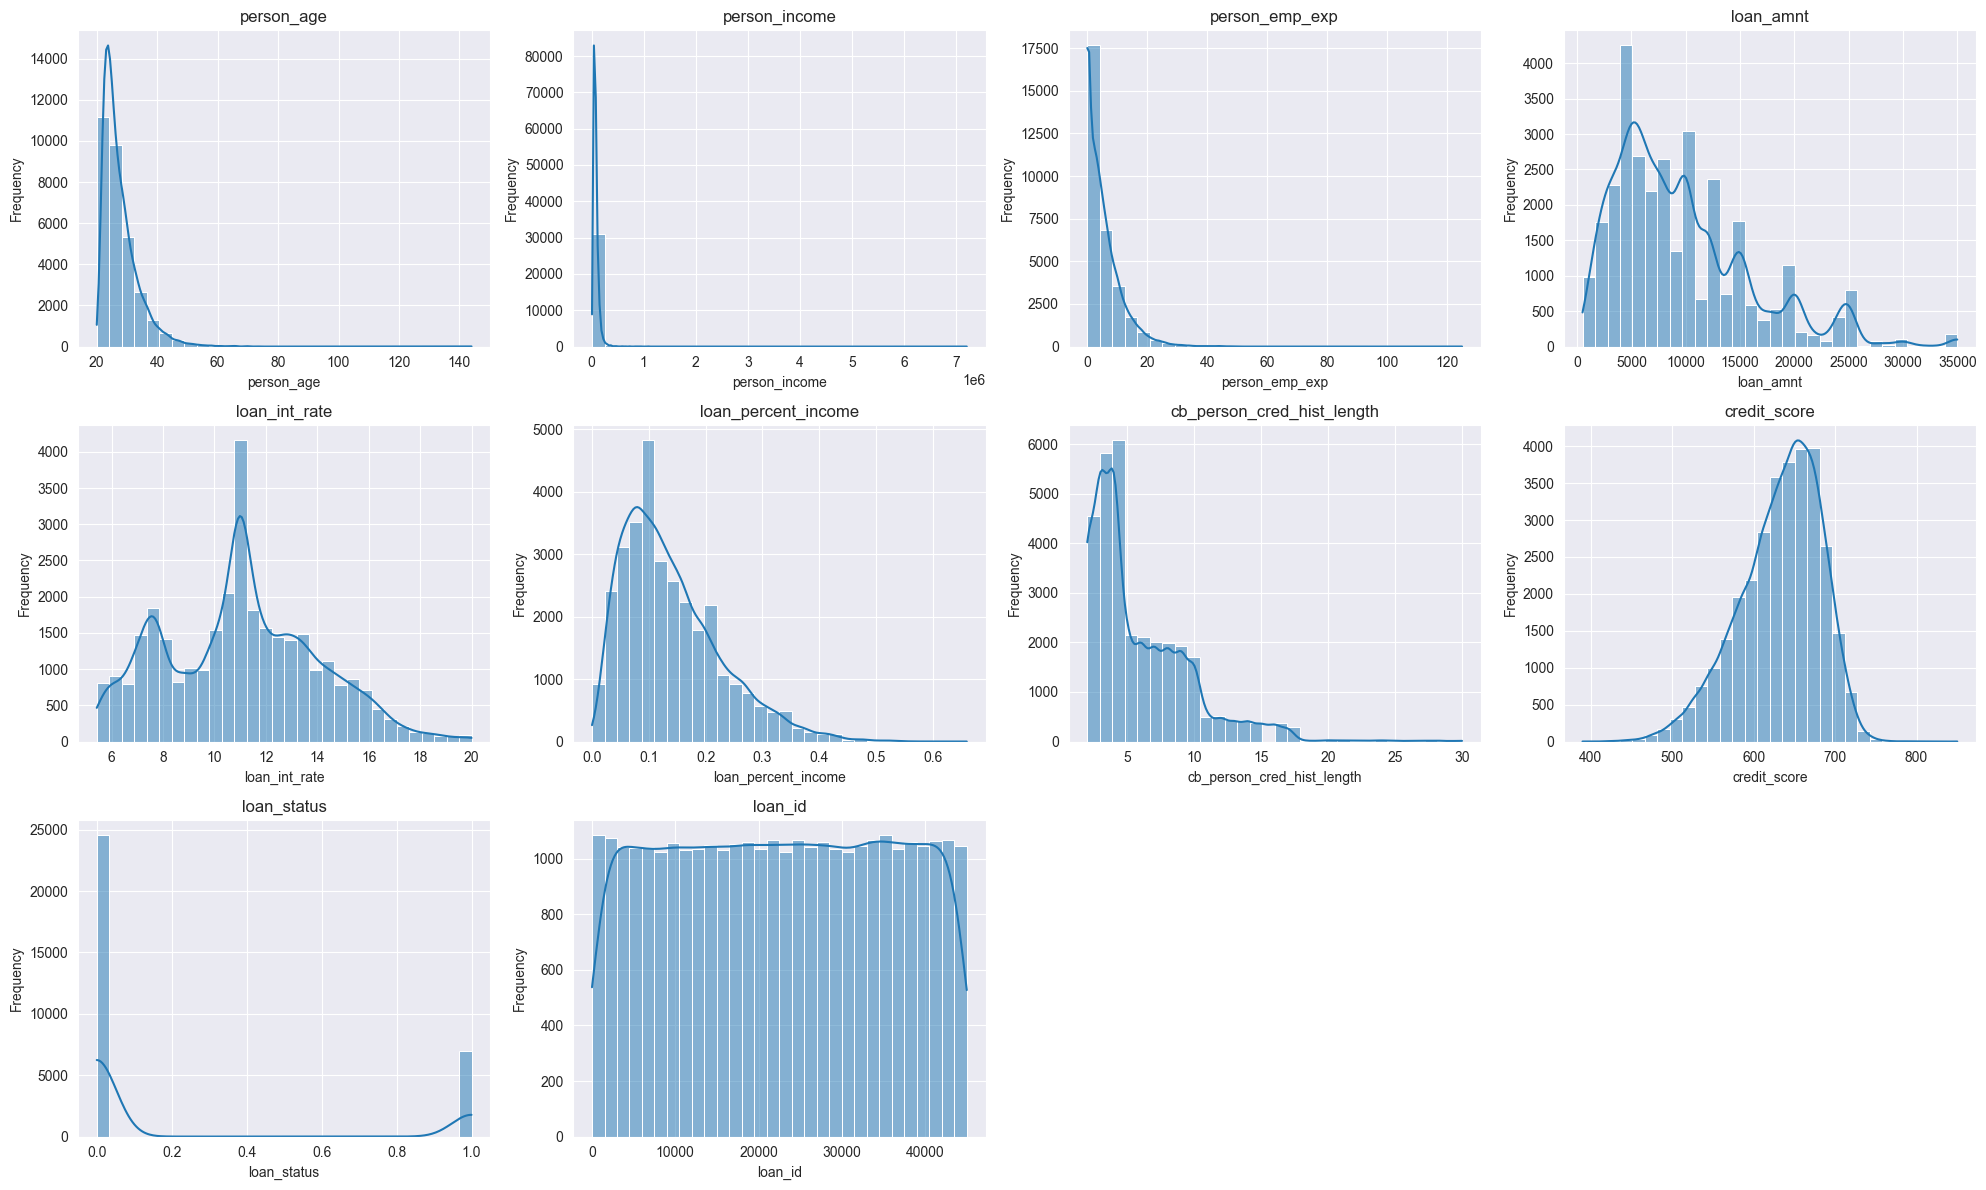

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

# Identify numerical columns
num_cols = train_path.select_dtypes(include=['int64', 'float64']).columns
print("Numerical variables:", len(num_cols))

# Dynamically calculate rows and columns for subplots
num_cols_per_row = 4  # Number of columns in the grid
num_rows = -(-len(num_cols) // num_cols_per_row)  # Ceiling division for rows

# Adjust figure size dynamically
plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4))

# Plot each numerical column
for index, col in enumerate(num_cols, start=1):
    plt.subplot(num_rows, num_cols_per_row, index)
    sns.histplot(train_path[col], kde=True, bins=30)  # Histogram with KDE
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Numerical variables: 10


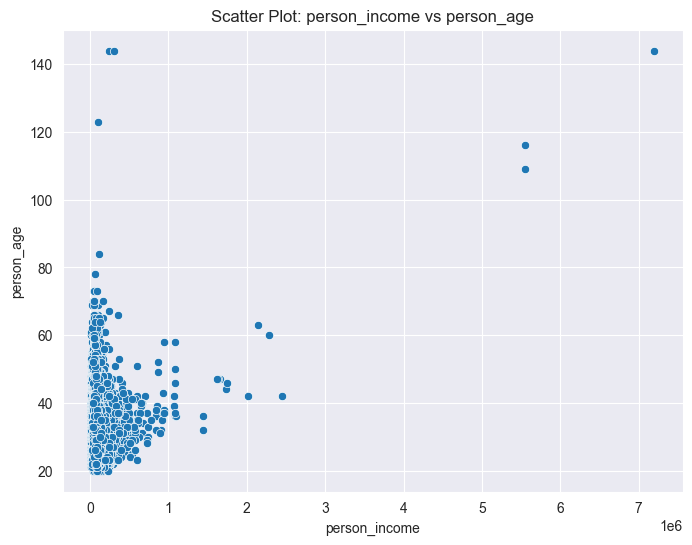

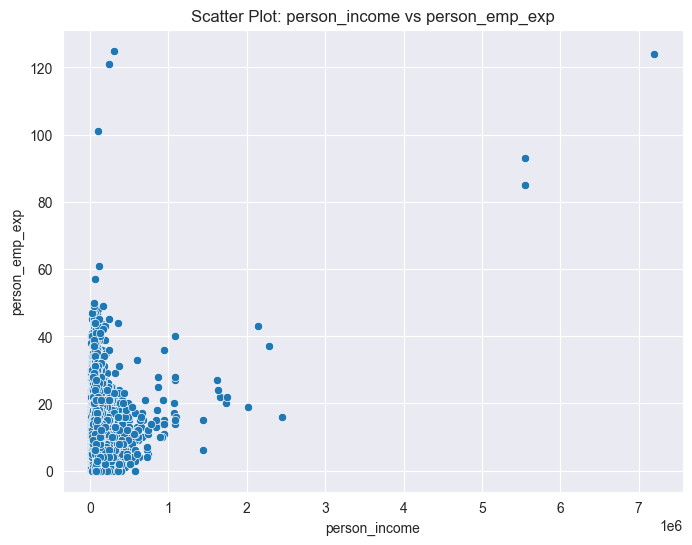

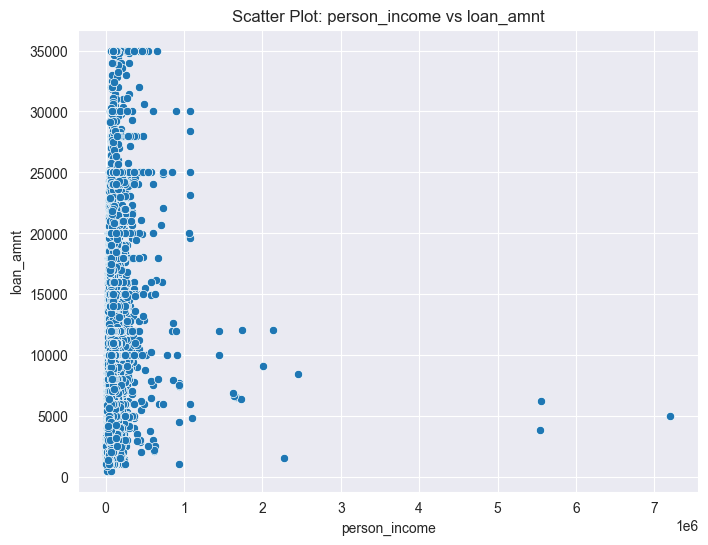

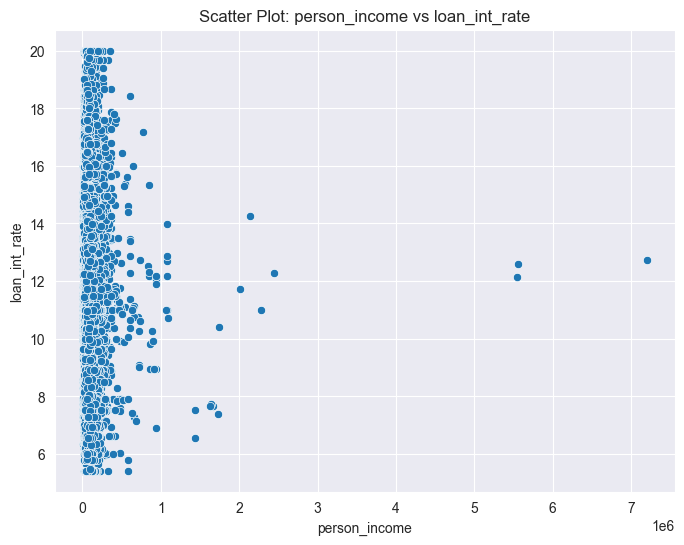

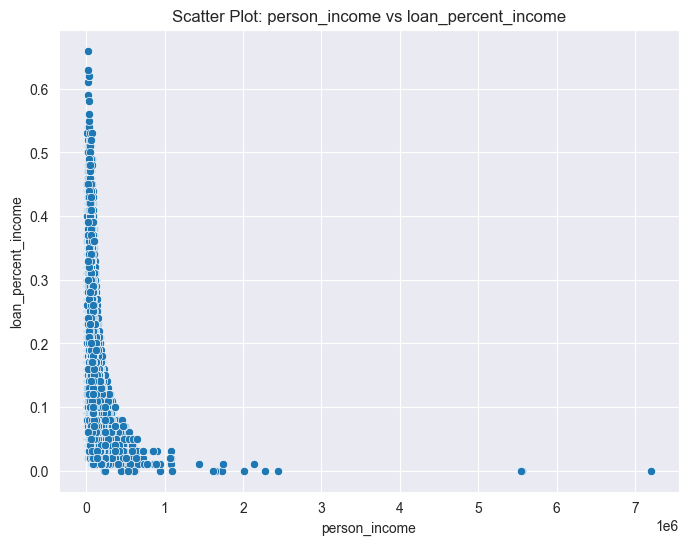

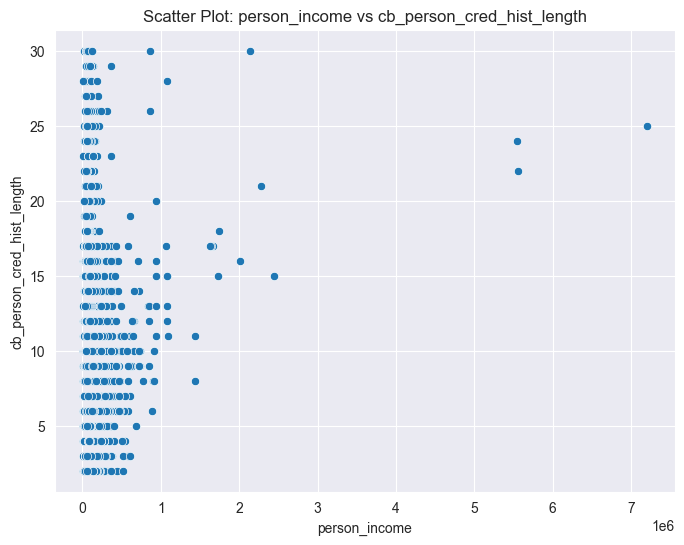

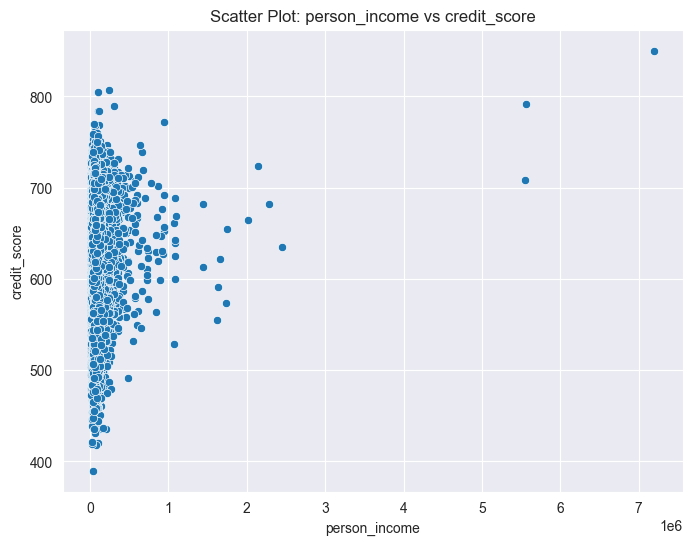

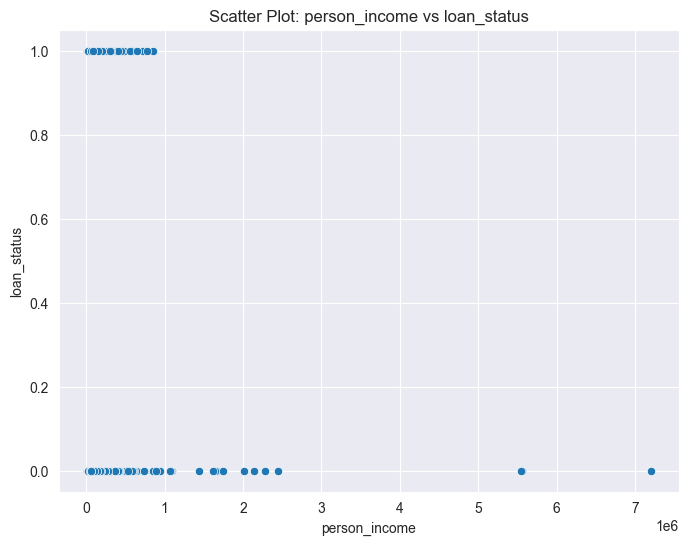

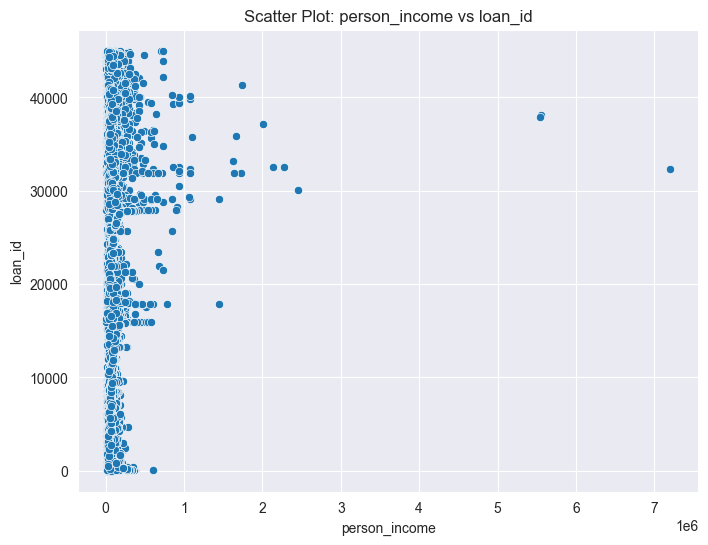

In [9]:
sns.set_style('darkgrid')
sns.set_palette('tab10')


def compare_person_income(train_path):
    # Identify numerical columns
    num_cols = train_path.select_dtypes(include=['int64', 'float64']).columns
    print("Numerical variables:", len(num_cols))

    # Generate scatter plots for comparisons
    for col in num_cols:
        if col != 'person_income':  
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=train_path['person_income'], y=train_path[col])
            plt.title(f"Scatter Plot: person_income vs {col}")
            plt.xlabel('person_income')
            plt.ylabel(col)
            plt.show()

# Call the function to generate the plots
compare_person_income(train_path)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

def clf(model_clf, x, y, x_train, x_test, y_train, y_test, class_names=None):
    # Fit the model
    model_clf.fit(x_train, y_train)
    
    # Predict
    y_train_pred = model_clf.predict(x_train)
    y_test_pred = model_clf.predict(x_test)
    
    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")
    
    # Classification report
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=class_names))
    
    # Cross-validation score
    cv_score = cross_val_score(model_clf, x_train, y_train, cv=5).mean()
    print(f"Cross-Validation Score (mean): {cv_score:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_clf.__class__.__name__}")
    plt.tight_layout()
    plt.show()


<Axes: >

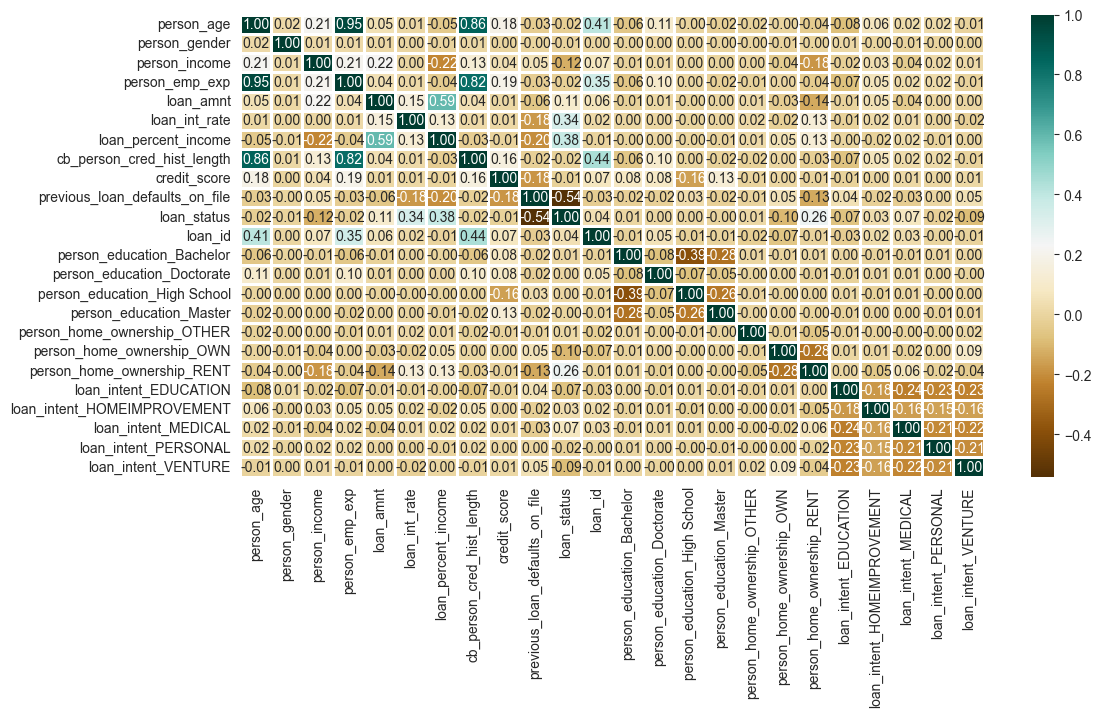

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(train_path.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

In [ ]:
print(train_path.head())

   person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
0        26.0              1      -0.930802               2   1.000000   
1        23.0              0      -0.982641               0  -0.654783   
2        33.0              1      -0.981243              10  -0.623188   
3        27.0              0      -0.995259               7  -0.710145   
4        30.0              0      -0.985182               8  -0.798029   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          10.65                 0.14                         2.0   
1          10.24                 0.09                         3.0   
2           7.03                 0.09                         9.0   
3           7.43                 0.22                         8.0   
4          10.86                 0.06                         9.0   

   credit_score  previous_loan_defaults_on_file  ...  \
0      0.100000                               0  ...   
1      0.013043             

In [ ]:
print(test_path.head())

   person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
0        23.0              0      -0.989052               0  -0.797101   
1        29.0              0      -0.962852               8   0.188406   
2        23.0              0      -0.983642               0  -0.611594   
3        29.0              1      -0.986607               3  -0.333333   
4        32.0              1      -0.969162               9  -0.159420   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          10.59                 0.08                         2.0   
1          10.65                 0.15                         5.0   
2          11.71                 0.11                         3.0   
3          11.01                 0.21                         9.0   
4          10.95                 0.13                         5.0   

   credit_score  previous_loan_defaults_on_file  ...  \
0      0.369565                               1  ...   
1     -0.117391             

In [ ]:
# Split training data
x = train_path.drop(['loan_status', 'loan_id'], axis=1)
y = train_path['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Training

In [70]:
# Logistic Regression Model
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train, y_train)
y_pred_logistic = lg.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4895
           1       0.77      0.74      0.75      1405

    accuracy                           0.89      6300
   macro avg       0.85      0.84      0.84      6300
weighted avg       0.89      0.89      0.89      6300



In [80]:
# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
nn_model.fit(x_train, y_train)
y_prediction_neuralnetwork = nn_model.predict(x_test)
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")

Neural Network Accuracy: 0.91


In [81]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Decision Tree Accuracy: 0.90


In [82]:
# SVM Model
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

SVM Accuracy: 0.86


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

def clf(model_clf, x, y, x_train, x_test, y_train, y_test, class_names=None):
    # Fit the model
    model_clf.fit(x_train, y_train)
    
    # Predict
    y_train_pred = model_clf.predict(x_train)
    y_test_pred = model_clf.predict(x_test)
    
    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")
    
    # Classification report
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=class_names))
    
    # Cross-validation score
    cv_score = cross_val_score(model_clf, x_train, y_train, cv=5).mean()
    print(f"Cross-Validation Score (mean): {cv_score:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_clf.__class__.__name__}")
    plt.tight_layout()
    plt.show()


Train Accuracy: 0.8886
Test Accuracy: 0.8227

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4895
           1       0.63      0.49      0.55      1405

    accuracy                           0.82      6300
   macro avg       0.75      0.71      0.72      6300
weighted avg       0.81      0.82      0.81      6300

Cross-Validation Score (mean): 0.8324



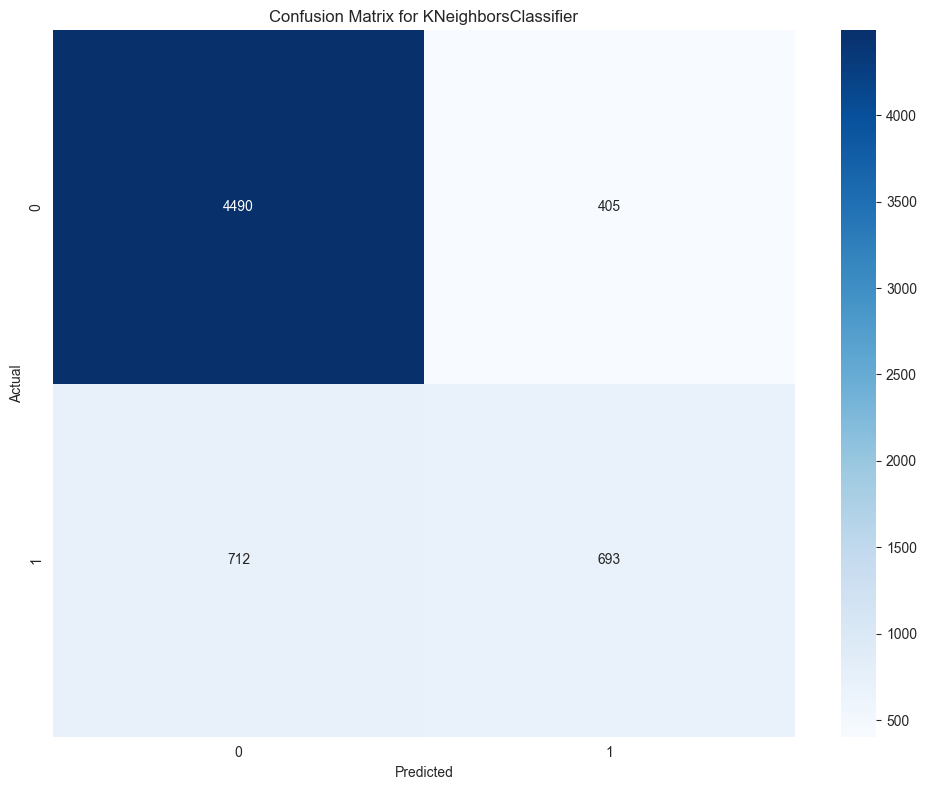

In [ ]:
KNC = KNeighborsClassifier()
model_clf = KNC
class_names = ['0', '1']  
clf(model_clf, x, y, x_train, x_test, y_train, y_test, class_names=class_names)

Predictions

In [ ]:
# Make Predictions on Test Data
test_processed = test_path.drop(['loan_status', 'loan_id'], axis=1, errors='ignore')
predictions = lg.predict(test_processed)

In [ ]:
# Save to CSV
result = pd.DataFrame({'loan_id': train_path['loan_id'], 'loan_status': predictions})
result.to_csv('result.csv', index=False)
print("Result file created!")

Result file created!
